In [289]:
import pandas as pd
import datetime
import glob
import numpy as np
import matplotlib.pyplot as plt
import talib

In [290]:
#Give the path it will return the Close price of the file with minute wise data
def Daily_data_path(path):
    df = pd.read_csv(path).loc[:,["Date","Time","Close"]]
    if "Date" in df.index.values:
        df = df.set_index(df.loc[:,"Date"])
        df = df.drop("Date",axis=1)
    return df.groupby(level=0,as_index=True).nth([-1])

#Give the df it will return the Close price of the file with minute wise data
def Daily_data_df(df):
    if "Date" in df.index.values:
        df = df.set_index(df.loc[:,"Date"])
        df = df.drop("Date",axis=1)
    return df.groupby(level=0,as_index=True).nth([-1])

In [483]:
#we have separate csv files... so concatenating into 1
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
years = ["2015","2016","2017","2018"]
def Concatenation(month_list,year_list):
    empty_df = pd.DataFrame(columns=["Date","Time","Close"])
    for i in year_list:
        for j in month_list:
            df_month = pd.read_csv("C:\\Users\\Avneesh\\Desktop\\SENSUM\\NIFTY\\"+str(i)+"\\NIFTY_"+j+"_"+i+".csv").loc[:,["Date","Time","Close"]]
            frames = [empty_df,df_month]
            empty_df = pd.concat(frames)
    empty_df.index = empty_df.iloc[:,0]
    empty_df = empty_df.drop("Date",axis=1)
    return empty_df

In [484]:
def DEMA(df,period,add=False):
    close = df.loc[:,"Close"]
    DEMA = talib.DEMA(close,timeperiod=period)
    duplicate = df
    if add:
        df["DEMA"+str(period)] = DEMA
        return df
    else:
        duplicate["DEMA"+str(period)] = DEMA
        return duplicate

In [485]:
def DEMA_SIGNAL(df,period1,period2): # period1 that crosses over period2
    
    final_df = DEMA(df,period1)   # 2 periods of 5 minute data
    final_df = DEMA(df,period2)   # 10 periods of 5 minute dta
    qr = final_df.dropna()
    qr.loc[:,"DEMA_Signal"] = 0
    for i in range(1,len(qr)):
        if qr.iloc[i,1]>qr.iloc[i,2] and qr.iloc[i-1,1]<qr.iloc[i-1,2]:
            qr.iloc[i,-1] = 1
        elif qr.iloc[i,1]<qr.iloc[i,2] and qr.iloc[i-1,1]>qr.iloc[i-1,2]:
            qr.iloc[i,-1] = -1
    return qr


In [486]:
def resample(df,period):
    resampled_df=pd.DataFrame(df.loc[:,"Close"].resample(str(period)+"T").asfreq())
    return resampled_df

In [487]:
comb_df = Concatenation(months,years)
#comb_df = pd.read_csv("C:\\Users\\Avneesh\\Desktop\\SENSUM\\NIFTY\\2008\\NIFTY.csv",index_col=1).loc[:,["Time","Close"]]


In [488]:
comb_df

,Time,Close
Date,,
20150101,09:16,8255.00
20150101,09:17,8254.10
20150101,09:18,8261.40
20150101,09:19,8259.60
20150101,09:20,8253.80
20150101,09:21,8251.15
20150101,09:22,8250.45
20150101,09:23,8257.40
20150101,09:24,8261.40


In [489]:
#this id done to convert string index to datetime index
date_list=[]
for i in range(len(comb_df)):
    x = comb_df.index.values[i]
    z = list(comb_df.iloc[i,0])
    z = z[0:2]+z[3:]
    y = list(str(x))
    date_list.append(datetime.datetime(int("".join(y[0:4])),int("".join(y[4:6])),int("".join(y[6:])),int("".join(z[0:2])),int("".join("".join(z[2:]))),0))               
date_list=(pd.to_datetime(date_list))
comb_df.index=date_list

In [490]:
#comb_df=comb_df.drop("Time",axis=1)
type(comb_df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [491]:
comb_df = comb_df[~comb_df.index.duplicated()]

In [492]:
#to get 5 min data
resampled_df = (resample(comb_df,5))

In [493]:
resampled_df=resampled_df.dropna()
resampled_df.head()

,Close
2015-01-01 09:20:00,8253.80
2015-01-01 09:25:00,8261.35
2015-01-01 09:30:00,8259.70
2015-01-01 09:35:00,8256.60
2015-01-01 09:40:00,8256.55


In [494]:
resampled_df = resampled_df.dropna()
resampled_df.head()

,Close
2015-01-01 09:20:00,8253.80
2015-01-01 09:25:00,8261.35
2015-01-01 09:30:00,8259.70
2015-01-01 09:35:00,8256.60
2015-01-01 09:40:00,8256.55


In [495]:
#gives long signal when faster signal crosses over slower signal
resampled_df=DEMA_SIGNAL(resampled_df,2,10)

C:\Users\Avneesh\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Avneesh\Anaconda3\lib\site-packages\pandas\core\indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\Avneesh\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [496]:
def RSI(df,days,daily_data=True):
    if daily_data:
        rsi_array=talib.RSI(df.loc[:,"Close"],days)
    return rsi_array

In [497]:
def Daily_data(df,position):
    return df.groupby(df.index.date).nth([position])
daily_close = Daily_data(comb_df,-1)
daily_open=Daily_data(comb_df,0)

In [498]:
RSI_df = pd.DataFrame(RSI(daily_close,5))

In [499]:
#next below cells r done to add rsi to the dataframe..basicall removed time from index and then adding rsi array...and then again adding back time componenet to the index

In [500]:
a = resampled_df.index
np.save("index.npy",a)

In [501]:
resampled_df.index = resampled_df.index.date

In [502]:
merge=pd.merge(resampled_df,RSI_df, how='inner', left_index=True, right_index=True)

In [503]:
merge.index = np.load("index.npy")
merge

,Close,DEMA2,DEMA10,DEMA_Signal,0
2015-01-01 10:50:00,8269.55,8269.181289,8269.179271,0,NaN
2015-01-01 10:55:00,8268.65,8268.791258,8269.227640,-1,NaN
2015-01-01 11:00:00,8269.70,8269.618473,8269.588031,1,NaN
2015-01-01 11:05:00,8270.20,8270.191064,8269.998275,0,NaN
2015-01-01 11:10:00,8269.25,8269.414213,8269.965520,-1,NaN
2015-01-01 11:15:00,8271.10,8270.899357,8270.531510,1,NaN
2015-01-01 11:20:00,8276.25,8275.731325,8272.631668,0,NaN
2015-01-01 11:25:00,8275.80,8276.098733,8274.008413,0,NaN
2015-01-01 11:30:00,8276.10,8276.273452,8275.088436,0,NaN
2015-01-01 11:35:00,8273.95,8274.304665,8275.134122,-1,NaN


In [504]:
merge.loc[:,"RSI_SIGNAL"] = 0
for i in merge.index.values:
    if merge.loc[i,0] > 50 :
        merge.loc[i,"RSI_SIGNAL"] = 1
    elif merge.loc[i,0] < 50 :
        merge.loc[i,"RSI_SIGNAL"] = -1
    
    
merge = merge.dropna()

In [505]:
#not necessary
merge.loc[:,"Time"] = merge.index.time
merge.head()

C:\Users\Avneesh\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Avneesh\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Close,DEMA2,DEMA10,DEMA_Signal,0,RSI_SIGNAL,Time
2015-01-08 09:20:00,8190.50,8183.062697,8136.486191,0,44.686596,-1,09:20:00
2015-01-08 09:25:00,8182.15,8186.119261,8153.118315,0,44.686596,-1,09:25:00
2015-01-08 09:30:00,8181.80,8184.383652,8165.096239,0,44.686596,-1,09:30:00
2015-01-08 09:35:00,8179.00,8180.553628,8172.741089,0,44.686596,-1,09:35:00
2015-01-08 09:40:00,8180.30,8180.593124,8178.495375,0,44.686596,-1,09:40:00


Number of days going Long:     587
Number of days going Short:    378


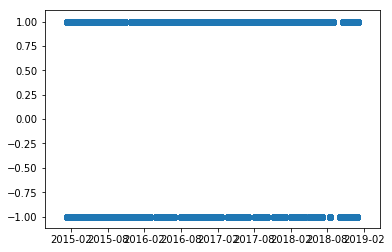

In [506]:
plt.scatter(merge.index.values,merge.loc[:,"RSI_SIGNAL"])
print("Number of days going Long:     "+str(len(RSI_df[RSI_df.iloc[:,0]>50])))
print("Number of days going Short:    "+str(len(RSI_df[RSI_df.iloc[:,0]<50])))

In [507]:
entry = {}
exit = {}

for i,j in merge.groupby(merge.index.date):
    counter=0
    punter=0
    for k in range(len(j)):
        if  j.iloc[k,3]==j.iloc[k,5] and j.iloc[k,5] != 0  :
        
            entry[i] = j.iloc[k,[0,3,5,6]]
            start = k
            counter=1
            break
    #
    if counter==1:
        stoploss = -0.002
        punter1=0
        punter2=0
        punter3=0
        punter4=0
        for h in range(start,len(j)):
            if (j.iloc[start,3]*(j.iloc[h,0]-j.iloc[start,0])/j.iloc[start,0]) <= stoploss:
                exit[i]= j.iloc[h,[0,3,5,6]]
                punter =1
                break 
            
            elif  (j.iloc[start,3]*(j.iloc[h,0]-j.iloc[start,0])/j.iloc[start,0]) >= 0.01:
                exit[i]= j.iloc[h,[0,3,5,6]]
                punter =1
                break
                
            elif  (j.iloc[start,3]*(j.iloc[h,0]-j.iloc[start,0])/j.iloc[start,0]) >= 0.008: 
                stoploss = 0.006
                punter1 = 1
                
            elif  punter1 == 0 and (j.iloc[start,3]*(j.iloc[h,0]-j.iloc[start,0])/j.iloc[start,0]) >= 0.006:
                stoploss = 0.004
                punter2 =1
            
            elif  punter2 == 0 and  (j.iloc[start,3]*(j.iloc[h,0]-j.iloc[start,0])/j.iloc[start,0]) >= 0.004:
                stoploss = 0.002
                punter3 =1
            
            elif  punter3 == 0 and  (j.iloc[start,3]*(j.iloc[h,0]-j.iloc[start,0])/j.iloc[start,0]) >= 0.002:
                stoploss = 0.00
            
            if punter!=1:
                exit[i]=j.iloc[-1,[0,3,5,6]]

In [535]:
def paisa(entry_dict,exit_dict,initial_cash=1000000,leverage=8,brockerage=0.0002):
    bookvalue=initial_cash
    profit_container=[]
    portfolio=[]
    for i in entry_dict.keys():    
        stock_num= int(leverage*bookvalue/entry_dict[i][0])
        if stock_num < 1:
            break
        turnover = (entry_dict[i][0]+exit_dict[i][0])*stock_num
        brocker_costs = turnover*brockerage
        profit = entry_dict[i][1]*(exit_dict[i][0]-entry_dict[i][0])*stock_num - brocker_costs
        profit_cumsum = np.sum(profit_container)
        bookvalue = (initial_cash) if  initial_cash+profit_cumsum > initial_cash else initial_cash+profit_cumsum
        #bookvalue+=profit 
        profit_container.append(profit)
        portfolio.append(bookvalue)
        
    return profit_container,bookvalue,portfolio

1709387.3005500103

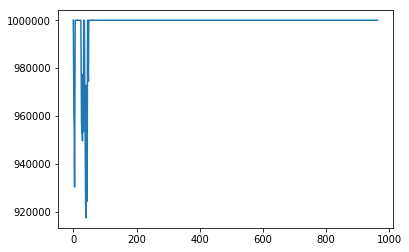

In [537]:
a,b,c=paisa(entry,exit)
plt.plot(c)
np.sum(a)
#c[-1]

-0.002121153687226114

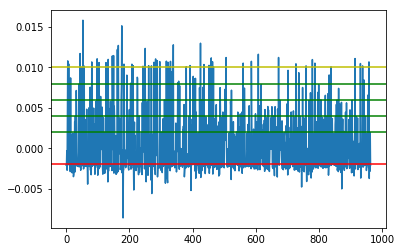

In [510]:
prof_percent = []
for i in entry.keys():
    prof = entry[i][1]*(exit[i][0]-entry[i][0])/entry[i][0]
    prof_percent.append(prof)
plt.plot(prof_percent)
plt.axhline(y=-0.002,color="r")
plt.axhline(y=0.002,color="g")
plt.axhline(y=0.004,color="g")
plt.axhline(y=0.006,color="g")
plt.axhline(y=0.008,color="g")
plt.axhline(y=0.01,color="y")
np.sum(prof)

In [542]:
winning_trades=[]
losing_trades=[]
for i in (entry.keys()):
    profit_percentage = entry[i][1]*(exit[i][0]-entry[i][0])/entry[i][0] 
    if profit_percentage > 0:
        winning_trades.append(profit_percentage)
    elif profit_percentage <0:
        losing_trades.append(profit_percentage)

print("Profit percent of strat   :       " + str(100*(np.sum(a)-1000000)/1000000) + " %") 
print("Profit percent of index   :       " + str(100*(comb_df.iloc[-1,1]-comb_df.iloc[0,1])/comb_df.iloc[0,1])+ " %") 
print("No. of winning trades     :       " + str(len(winning_trades)))
print("No. of losing trades      :       " + str(len(losing_trades)))
print("Winning Percentage        :       " + str(100*len(winning_trades)/(len(entry)))+" %")
print("Average in winning        :       " + str(100*np.average(winning_trades)))
print("Average in losing         :       " + str(100*np.average(losing_trades)) +" %")
print("Std profit:               :       " + str(100*np.std(winning_trades)) + " %")
print("Std. loss:                :       " + str(100*np.std(losing_trades)))
print("Gain to Pain ratio        :       " + str(abs(np.sum(winning_trades)/np.sum(losing_trades))))
print("No. of positions          :       " + str(len(entry)))


Profit percent of strat   :       70.93873005500103 %
Profit percent of index   :       31.58752271350696 %
No. of winning trades     :       372
No. of losing trades      :       592
Winning Percentage        :       38.58921161825726 %
Average in winning        :       0.46460549273024504
Average in losing         :       -0.19035936446643928 %
Std profit:               :       0.33919718480661404 %
Std. loss:                :       0.10883137935781588
Gain to Pain ratio        :       1.5336678966428774
No. of positions          :       964


In [512]:
for i in entry.keys():
    print(entry[i])
    print("############################################")
    print(exit[i])
    print("*************************************************************************")
    print("*************************************************************************")

Close           8177.05
DEMA_Signal          -1
RSI_SIGNAL           -1
Time           09:45:00
Name: 2015-01-08 09:45:00, dtype: object
############################################
Close           8194.15
DEMA_Signal           1
RSI_SIGNAL           -1
Time           10:25:00
Name: 2015-01-08 10:25:00, dtype: object
*************************************************************************
*************************************************************************
Close            8301.2
DEMA_Signal           1
RSI_SIGNAL            1
Time           09:20:00
Name: 2015-01-09 09:20:00, dtype: object
############################################
Close           8283.45
DEMA_Signal          -1
RSI_SIGNAL            1
Time           09:40:00
Name: 2015-01-09 09:40:00, dtype: object
*************************************************************************
*************************************************************************
Close            8271.1
DEMA_Signal           1
RSI_SIGNAL        

Close            8700.8
DEMA_Signal          -1
RSI_SIGNAL           -1
Time           11:35:00
Name: 2015-03-13 11:35:00, dtype: object
*************************************************************************
*************************************************************************
Close           8639.55
DEMA_Signal          -1
RSI_SIGNAL           -1
Time           09:25:00
Name: 2015-03-16 09:25:00, dtype: object
############################################
Close            8642.5
DEMA_Signal           1
RSI_SIGNAL           -1
Time           13:35:00
Name: 2015-03-16 13:35:00, dtype: object
*************************************************************************
*************************************************************************
Close           8672.15
DEMA_Signal          -1
RSI_SIGNAL           -1
Time           09:40:00
Name: 2015-03-17 09:40:00, dtype: object
############################################
Close            8695.8
DEMA_Signal           0
RSI_SIGNAL        

Name: 2015-05-29 13:30:00, dtype: object
*************************************************************************
*************************************************************************
Close           8442.75
DEMA_Signal           1
RSI_SIGNAL            1
Time           09:20:00
Name: 2015-06-01 09:20:00, dtype: object
############################################
Close           8425.35
DEMA_Signal           0
RSI_SIGNAL            1
Time           09:45:00
Name: 2015-06-01 09:45:00, dtype: object
*************************************************************************
*************************************************************************
Close            8383.2
DEMA_Signal          -1
RSI_SIGNAL           -1
Time           10:30:00
Name: 2015-06-02 10:30:00, dtype: object
############################################
Close            8340.4
DEMA_Signal           0
RSI_SIGNAL           -1
Time           12:05:00
Name: 2015-06-02 12:05:00, dtype: object
*************************

Close            8071.3
DEMA_Signal           0
RSI_SIGNAL           -1
Time           10:05:00
Name: 2015-08-28 10:05:00, dtype: object
*************************************************************************
*************************************************************************
Close            7973.2
DEMA_Signal          -1
RSI_SIGNAL           -1
Time           09:20:00
Name: 2015-08-31 09:20:00, dtype: object
############################################
Close            7997.7
DEMA_Signal           0
RSI_SIGNAL           -1
Time           10:30:00
Name: 2015-08-31 10:30:00, dtype: object
*************************************************************************
*************************************************************************
Close            7910.3
DEMA_Signal          -1
RSI_SIGNAL           -1
Time           09:20:00
Name: 2015-09-01 09:20:00, dtype: object
############################################
Close            7813.6
DEMA_Signal          -1
RSI_SIGNAL        

Name: 2015-10-23 09:20:00, dtype: object
############################################
Close           8298.55
DEMA_Signal          -1
RSI_SIGNAL            1
Time           13:00:00
Name: 2015-10-23 13:00:00, dtype: object
*************************************************************************
*************************************************************************
Close           8297.95
DEMA_Signal           1
RSI_SIGNAL            1
Time           10:30:00
Name: 2015-10-26 10:30:00, dtype: object
############################################
Close           8276.95
DEMA_Signal           0
RSI_SIGNAL            1
Time           11:05:00
Name: 2015-10-26 11:05:00, dtype: object
*************************************************************************
*************************************************************************
Close            8240.4
DEMA_Signal           1
RSI_SIGNAL            1
Time           09:35:00
Name: 2015-10-27 09:35:00, dtype: object
#########################

Name: 2016-01-01 13:15:00, dtype: object
*************************************************************************
*************************************************************************
Close           7918.75
DEMA_Signal          -1
RSI_SIGNAL           -1
Time           10:00:00
Name: 2016-01-04 10:00:00, dtype: object
############################################
Close           7838.35
DEMA_Signal           0
RSI_SIGNAL           -1
Time           11:20:00
Name: 2016-01-04 11:20:00, dtype: object
*************************************************************************
*************************************************************************
Close           7801.15
DEMA_Signal          -1
RSI_SIGNAL           -1
Time           09:40:00
Name: 2016-01-05 09:40:00, dtype: object
############################################
Close            7804.6
DEMA_Signal           0
RSI_SIGNAL           -1
Time           10:10:00
Name: 2016-01-05 10:10:00, dtype: object
*************************

Name: 2016-03-22 12:25:00, dtype: object
*************************************************************************
*************************************************************************
Close           7703.95
DEMA_Signal           1
RSI_SIGNAL            1
Time           09:50:00
Name: 2016-03-23 09:50:00, dtype: object
############################################
Close           7688.35
DEMA_Signal           0
RSI_SIGNAL            1
Time           10:45:00
Name: 2016-03-23 10:45:00, dtype: object
*************************************************************************
*************************************************************************
Close            7722.1
DEMA_Signal           1
RSI_SIGNAL            1
Time           09:25:00
Name: 2016-03-28 09:25:00, dtype: object
############################################
Close            7705.3
DEMA_Signal           0
RSI_SIGNAL            1
Time           09:45:00
Name: 2016-03-28 09:45:00, dtype: object
*************************

Name: 2016-05-24 13:35:00, dtype: object
*************************************************************************
*************************************************************************
Close           7877.65
DEMA_Signal           1
RSI_SIGNAL            1
Time           11:45:00
Name: 2016-05-25 11:45:00, dtype: object
############################################
Close            7932.8
DEMA_Signal           0
RSI_SIGNAL            1
Time           15:30:00
Name: 2016-05-25 15:30:00, dtype: object
*************************************************************************
*************************************************************************
Close           7957.45
DEMA_Signal           1
RSI_SIGNAL            1
Time           09:20:00
Name: 2016-05-26 09:20:00, dtype: object
############################################
Close           8059.35
DEMA_Signal           0
RSI_SIGNAL            1
Time           15:05:00
Name: 2016-05-26 15:05:00, dtype: object
*************************

*************************************************************************
Close           8671.35
DEMA_Signal          -1
RSI_SIGNAL           -1
Time           09:30:00
Name: 2016-08-22 09:30:00, dtype: object
############################################
Close              8640
DEMA_Signal           0
RSI_SIGNAL           -1
Time           13:30:00
Name: 2016-08-22 13:30:00, dtype: object
*************************************************************************
*************************************************************************
Close            8617.2
DEMA_Signal           1
RSI_SIGNAL            1
Time           09:35:00
Name: 2016-08-23 09:35:00, dtype: object
############################################
Close           8615.85
DEMA_Signal           0
RSI_SIGNAL            1
Time           10:45:00
Name: 2016-08-23 10:45:00, dtype: object
*************************************************************************
******************************************************************

*************************************************************************
Close           8385.25
DEMA_Signal           1
RSI_SIGNAL            1
Time           09:45:00
Name: 2017-01-16 09:45:00, dtype: object
############################################
Close            8418.7
DEMA_Signal           0
RSI_SIGNAL            1
Time           15:30:00
Name: 2017-01-16 15:30:00, dtype: object
*************************************************************************
*************************************************************************
Close            8435.7
DEMA_Signal           1
RSI_SIGNAL            1
Time           09:55:00
Name: 2017-01-17 09:55:00, dtype: object
############################################
Close            8415.2
DEMA_Signal           0
RSI_SIGNAL            1
Time           10:20:00
Name: 2017-01-17 10:20:00, dtype: object
*************************************************************************
******************************************************************

*************************************************************************
*************************************************************************
Close           9638.55
DEMA_Signal          -1
RSI_SIGNAL           -1
Time           09:45:00
Name: 2017-06-13 09:45:00, dtype: object
############################################
Close            9597.5
DEMA_Signal           0
RSI_SIGNAL           -1
Time           15:30:00
Name: 2017-06-13 15:30:00, dtype: object
*************************************************************************
*************************************************************************
Close            9597.1
DEMA_Signal          -1
RSI_SIGNAL           -1
Time           09:25:00
Name: 2017-06-14 09:25:00, dtype: object
############################################
Close            9621.6
DEMA_Signal           0
RSI_SIGNAL           -1
Time           14:35:00
Name: 2017-06-14 14:35:00, dtype: object
******************************************************************

*************************************************************************
*************************************************************************
Close           10370.8
DEMA_Signal          -1
RSI_SIGNAL           -1
Time           09:50:00
Name: 2017-11-08 09:50:00, dtype: object
############################################
Close           10313.8
DEMA_Signal           0
RSI_SIGNAL           -1
Time           15:30:00
Name: 2017-11-08 15:30:00, dtype: object
*************************************************************************
*************************************************************************
Close           10352.2
DEMA_Signal          -1
RSI_SIGNAL           -1
Time           09:40:00
Name: 2017-11-09 09:40:00, dtype: object
############################################
Close             10314
DEMA_Signal           0
RSI_SIGNAL           -1
Time           15:20:00
Name: 2017-11-09 15:20:00, dtype: object
******************************************************************

Name: 2018-04-04 10:45:00, dtype: object
*************************************************************************
*************************************************************************
Close             10247
DEMA_Signal           1
RSI_SIGNAL            1
Time           09:20:00
Name: 2018-04-05 09:20:00, dtype: object
############################################
Close           10327.7
DEMA_Signal          -1
RSI_SIGNAL            1
Time           15:30:00
Name: 2018-04-05 15:30:00, dtype: object
*************************************************************************
*************************************************************************
Close           10308.3
DEMA_Signal           1
RSI_SIGNAL            1
Time           10:05:00
Name: 2018-04-06 10:05:00, dtype: object
############################################
Close             10321
DEMA_Signal           0
RSI_SIGNAL            1
Time           15:30:00
Name: 2018-04-06 15:30:00, dtype: object
*************************

Name: 2018-08-10 11:10:00, dtype: object
*************************************************************************
*************************************************************************
Close           11365.5
DEMA_Signal          -1
RSI_SIGNAL           -1
Time           11:10:00
Name: 2018-08-13 11:10:00, dtype: object
############################################
Close           11389.8
DEMA_Signal           1
RSI_SIGNAL           -1
Time           12:35:00
Name: 2018-08-13 12:35:00, dtype: object
*************************************************************************
*************************************************************************
Close           11412.3
DEMA_Signal           1
RSI_SIGNAL            1
Time           10:15:00
Name: 2018-08-14 10:15:00, dtype: object
############################################
Close           11433.7
DEMA_Signal           0
RSI_SIGNAL            1
Time           15:30:00
Name: 2018-08-14 15:30:00, dtype: object
*************************

In [532]:
100*(comb_df.iloc[-1,1]-comb_df.iloc[0,1])/comb_df.iloc[0,1]

31.58752271350696